In [ ]:
import cv2

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/121.jpg')

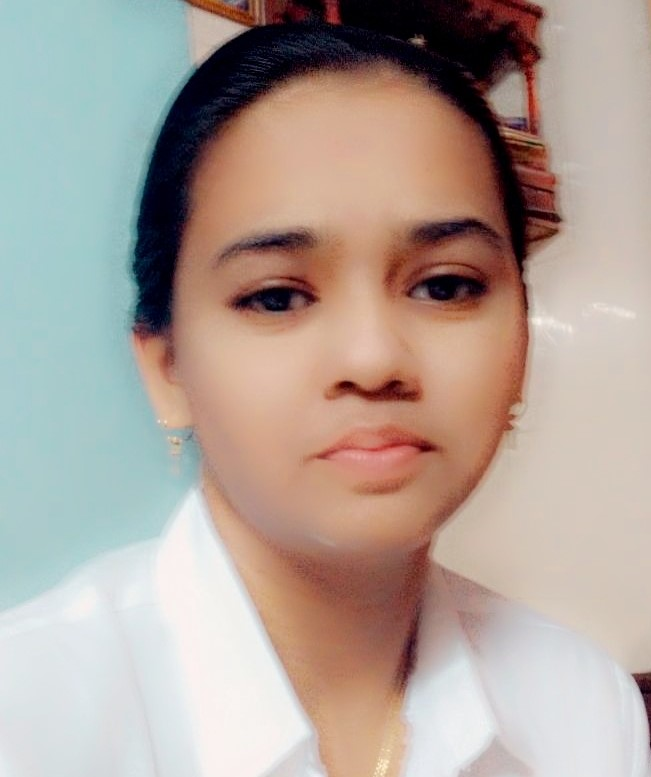

None


In [ ]:
print(cv2_imshow(img))

In [ ]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

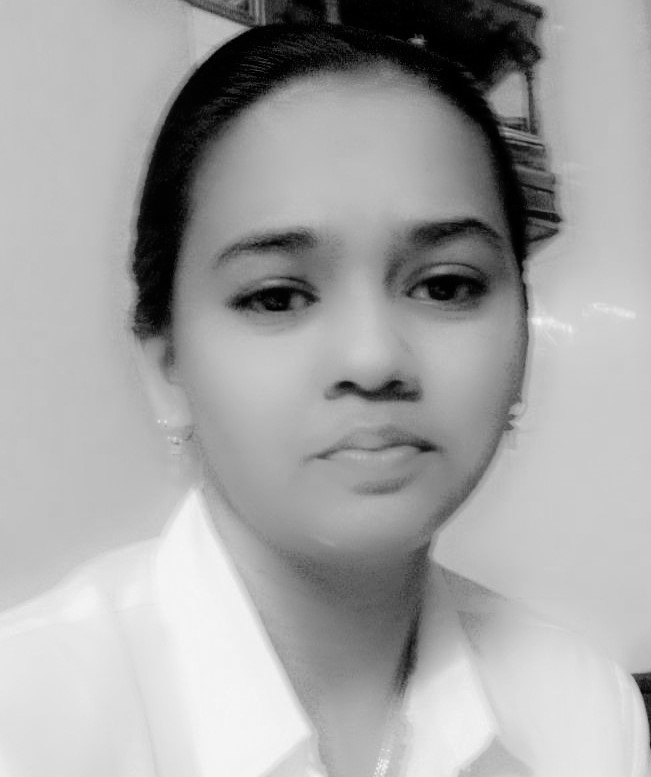

None


In [ ]:
print(cv2_imshow(img1))

In [ ]:
img3 = cv2.imread('/content/121.jpg', 0)

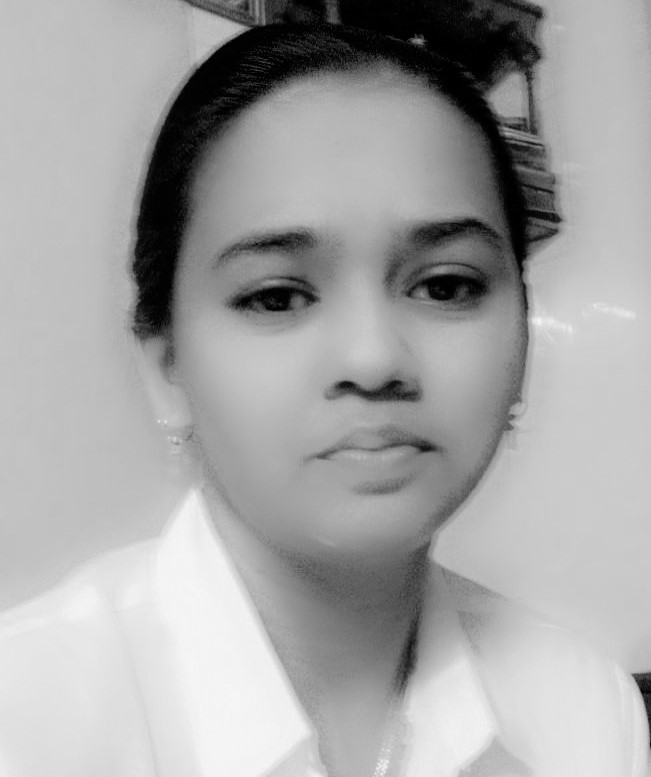

None


In [ ]:
print(cv2_imshow(img3))

In [ ]:
img3.shape

(777, 651)

In [ ]:
img4 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

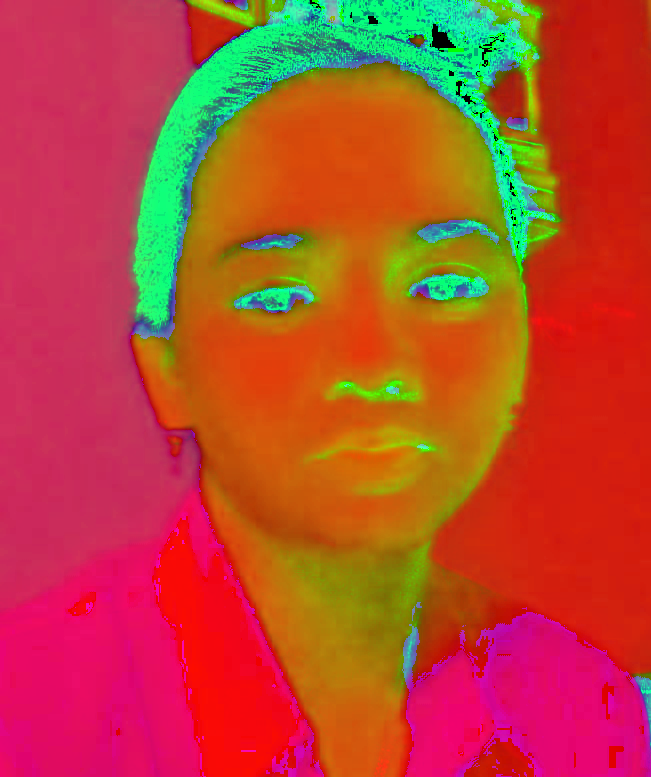

None


In [ ]:
print(cv2_imshow(img4))

In [ ]:
img5 = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

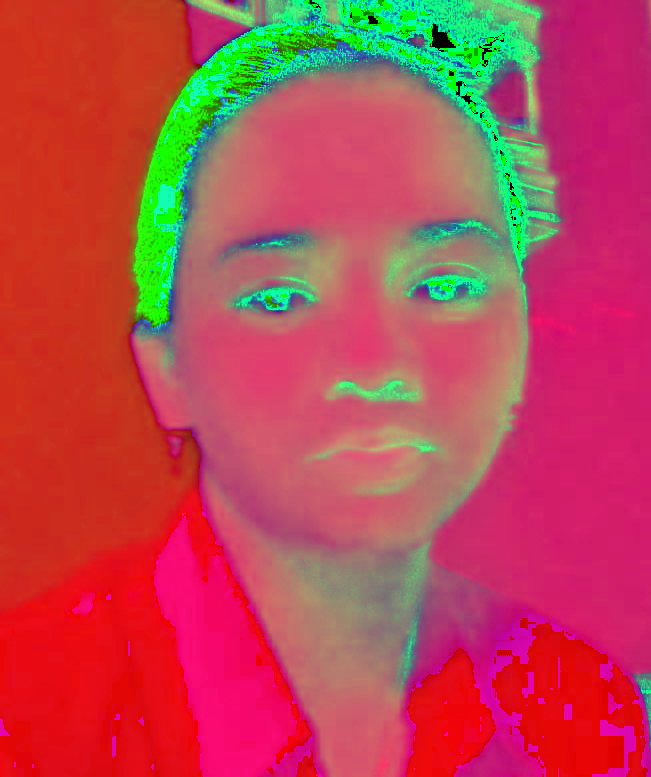

None


In [ ]:
print(cv2_imshow(img5))

In [ ]:
smaller_image_size = cv2.resize(img,(100, 100))

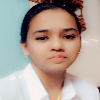

None


In [ ]:
print(cv2_imshow(smaller_image_size))

In [ ]:
img5.shape

(777, 651, 3)

In [ ]:
ret,thresh_binary = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)

In [ ]:
ret,thresh_binary_inv = cv2.threshold(img3,127,255,cv2.THRESH_BINARY_INV)

In [ ]:
ret,thresh_binary_trunc = cv2.threshold(img3,127,255,cv2.THRESH_TRUNC)

In [ ]:
ret,thresh_binary_tozero = cv2.threshold(img3,127,255,cv2.THRESH_TOZERO)

In [ ]:
ret,thresh_binary_tozero_inv = cv2.threshold(img3,127,255,cv2.THRESH_TOZERO_INV)

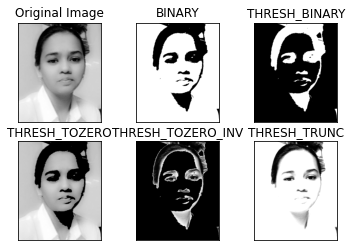

In [ ]:
name =["Original Image", "BINARY", "THRESH_BINARY","THRESH_TOZERO","THRESH_TOZERO_INV","THRESH_TRUNC"]
images = img3,thresh_binary,thresh_binary_inv,thresh_binary_tozero,thresh_binary_tozero_inv,thresh_binary_trunc
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(name[i])
    plt.xticks([]),plt.yticks([])

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

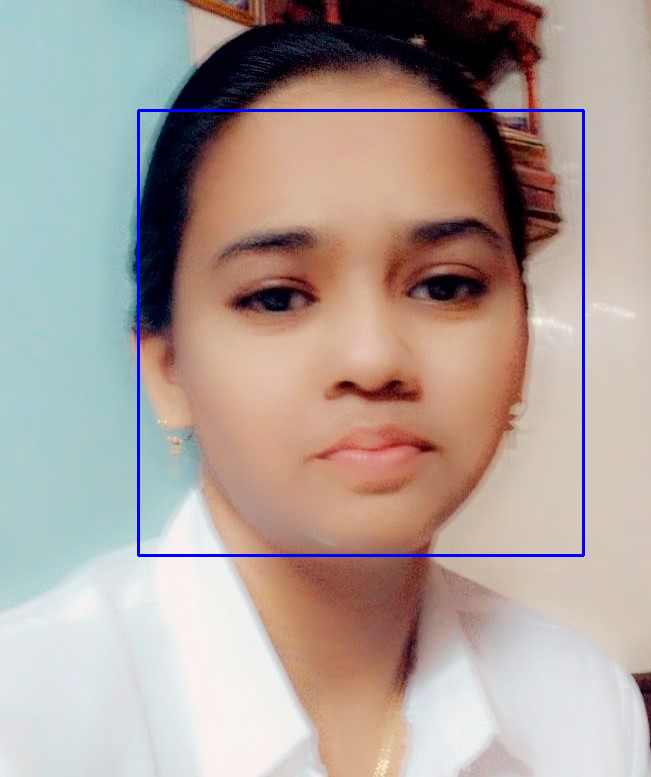

In [ ]:
faces = face_cascade.detectMultiScale(img3,1.1,4)
for (x,y,w,h ) in faces:
    cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0), 2)
    cv2_imshow(img)

In [ ]:
img = cv2.imread('/content/download.jpg')

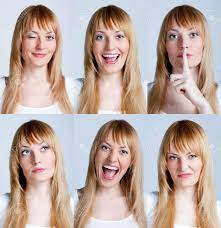

In [ ]:
cv2_imshow(img)

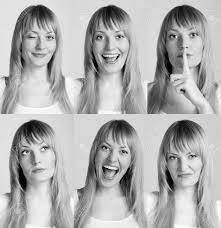

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

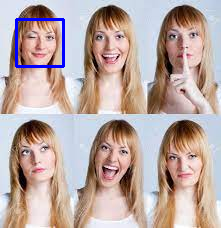

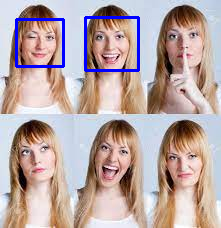

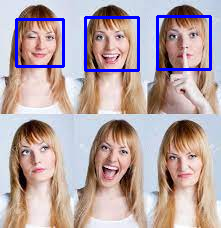

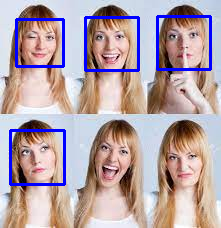

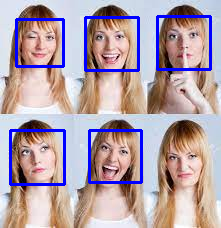

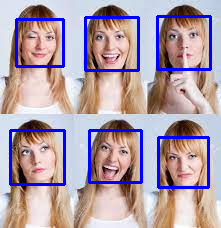

In [ ]:
faces = face_cascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
     cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0),2)
     cv2_imshow(img)
     cv2.waitKey()

***Face Age Detection Using Python*** 

In [ ]:
import cv2

In [ ]:
import sys

In [ ]:
import os

In [ ]:
import numpy as np


In [ ]:
print('Recognizing Face Please Be in sufficient Lights...')

Recognizing Face Please Be in sufficient Lights...


In [ ]:
import numpy

In [ ]:
import pickle

In [52]:
import math

In [53]:
import time

In [54]:
from google.colab.patches import cv2_imshow

In [55]:
def getFaceBox(net, frame, conf_threshold=0.7):
  frameOpencvDnn = frame.copy()
  frameHeight = frameOpencvDnn.shape[0]
  frameWidth = frameOpencvDnn.shape[1]
  blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)
  net.setInput(blob)
  detections = net.forward()
  bboxes = []
  for i in range(detections.shape[2]):
     confidence = detections[0, 0, i, 2]
     if confidence > conf_threshold:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
        bboxes.append([x1, y1, x2, y2])
        cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
        return frameOpencvDnn, bboxes

In [56]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

In [58]:
faceProto = "/content/opencv_face_detector.pbtxt"
faceModel = "/content/opencv_face_detector_uint8.pb"
ageProto = "/content/age_deploy.prototxt"
ageModel = "/content/age_net.caffemodel"
genderProto = "/content/gender_deploy.prototxt"
genderModel = "/content/gender_net.caffemodel"

In [59]:
faceNet = cv2.dnn.readNet(faceModel, faceProto)

In [61]:
ageNet = cv2.dnn.readNet(ageModel, ageProto)

In [62]:
genderNet = cv2.dnn.readNet(genderModel, genderProto)

In [138]:
def age_gender_detector(frame):
  t = time.time()
  frameFace, bboxes = getFaceBox(faceNet, frame)
  for bbox in bboxes:
     face = frame[max(0,bbox[1]-10):min(bbox[3]+10,frame.shape[0]-1),max(0,bbox[0]-10):min(bbox[2]+10, frame.shape[1]-1)]
     blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES,swapRB=False)
     genderNet.setInput(blob)
     genderPreds = genderNet.forward()
     gender = genderList[genderPreds[0].argmax()]
     print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))
     ageNet.setInput(blob)
     agePreds = ageNet.forward()
     age = ageList[agePreds[0].argmax()]
     print("Age Output : {}".format(agePreds))
     print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))
     label = "{},{}".format(gender, age)
     cv2.putText(frameFace, label, (bbox[0], bbox[1]-10),
     cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
  return frameFace

In [107]:
from google.colab import files

In [108]:
uploaded = files.upload()

Saving 121.jpg to 121 (2).jpg


In [158]:
input = cv2.imread("/content/girl1.jpg")

In [159]:
resized = cv2.resize(input,(256,256))

Gender : Female, conf = 0.998
Age Output : [[7.6157846e-07 1.2854806e-05 2.7519770e-03 3.6011278e-03 9.9313885e-01
  4.1946050e-04 1.6956172e-05 5.7984777e-05]]
Age : (25-32), conf = 0.993


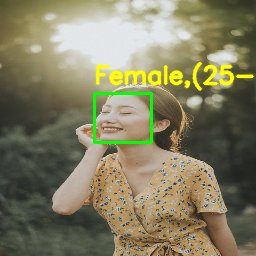

In [160]:
output = age_gender_detector(resized)
cv2_imshow(output)